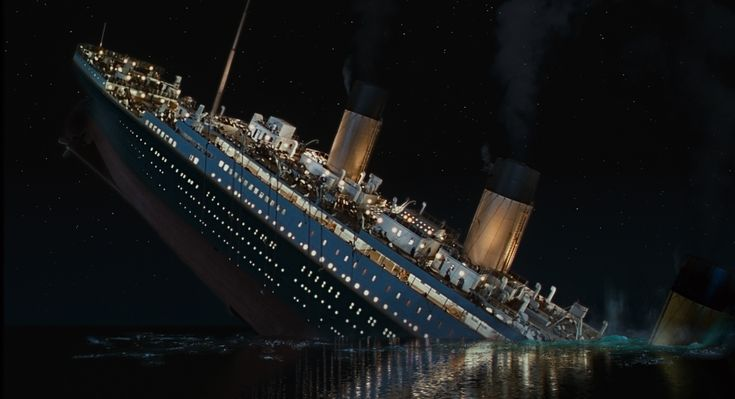

# TITANIC CLASSIFICATION

The sinking of the Titanic is one of the most infamous shipwrecks in history.

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone on board, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

In this challenge, we ask you to build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc).

## Data Preparation and Loading

In [65]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [66]:
# Load the Titanic dataset
data = pd.read_csv("Titanic-Dataset.csv")
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


## Data Exploration

In [67]:
print("The dataset has",data.shape[0], "rows")
print("The dataset has",data.shape[1], "colunms")

The dataset has 891 rows
The dataset has 12 colunms


In [68]:
data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [69]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [70]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [71]:
data.describe(include = 'object')

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [72]:
data.duplicated().sum()

0

### Checking the value counts of the 'Survived' column to understand the distribution of survival outcomes

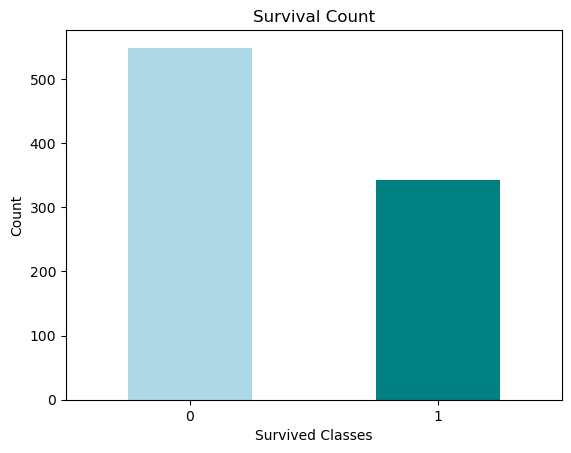

In [73]:
data['Survived'].value_counts().plot(kind='bar', color=['lightblue', 'teal'])
plt.xlabel('Survived Classes')
plt.ylabel('Count')
plt.title('Survival Count')
plt.xticks(rotation=0)
plt.show()

### Checking the value counts of the 'SibSip'(Siblings-Spouse) column to understand the distribution.

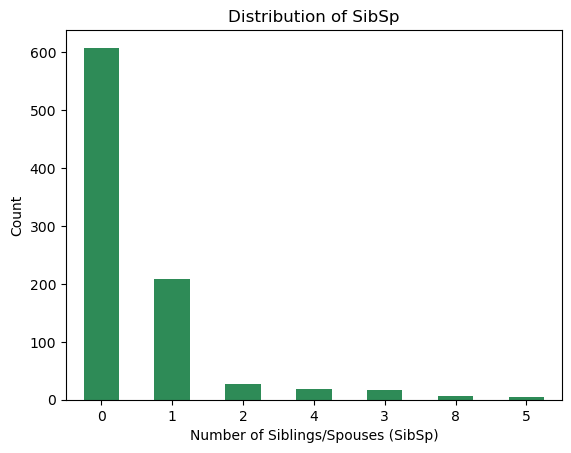

In [74]:
data['SibSp'].value_counts().plot(kind='bar', color='seagreen')
plt.xlabel('Number of Siblings/Spouses (SibSp)')
plt.ylabel('Count')
plt.title('Distribution of SibSp')
plt.xticks(rotation=0)
plt.show()

### Checking the value counts of the 'Parch'(Parent-Children) column to understand the distribution.

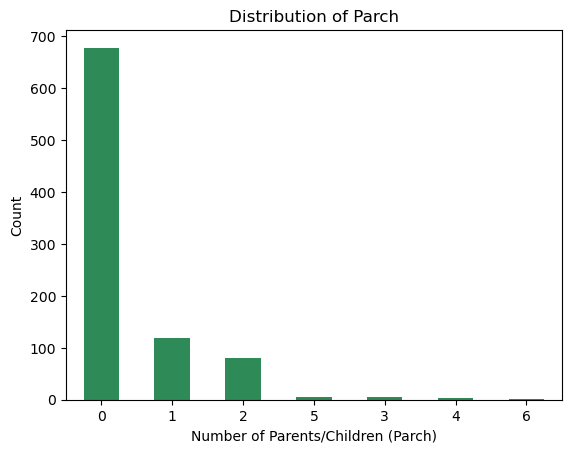

In [75]:
data['Parch'].value_counts().plot(kind='bar', color='seagreen')
plt.xlabel('Number of Parents/Children (Parch)')
plt.ylabel('Count')
plt.title('Distribution of Parch')
plt.xticks(rotation=0)
plt.show()

### Pairplot
Using a pairplot to visualize the relationships between numerical features in the dataset, with the points colored by the 'Survived' column to differentiate between survivors and non-survivors.

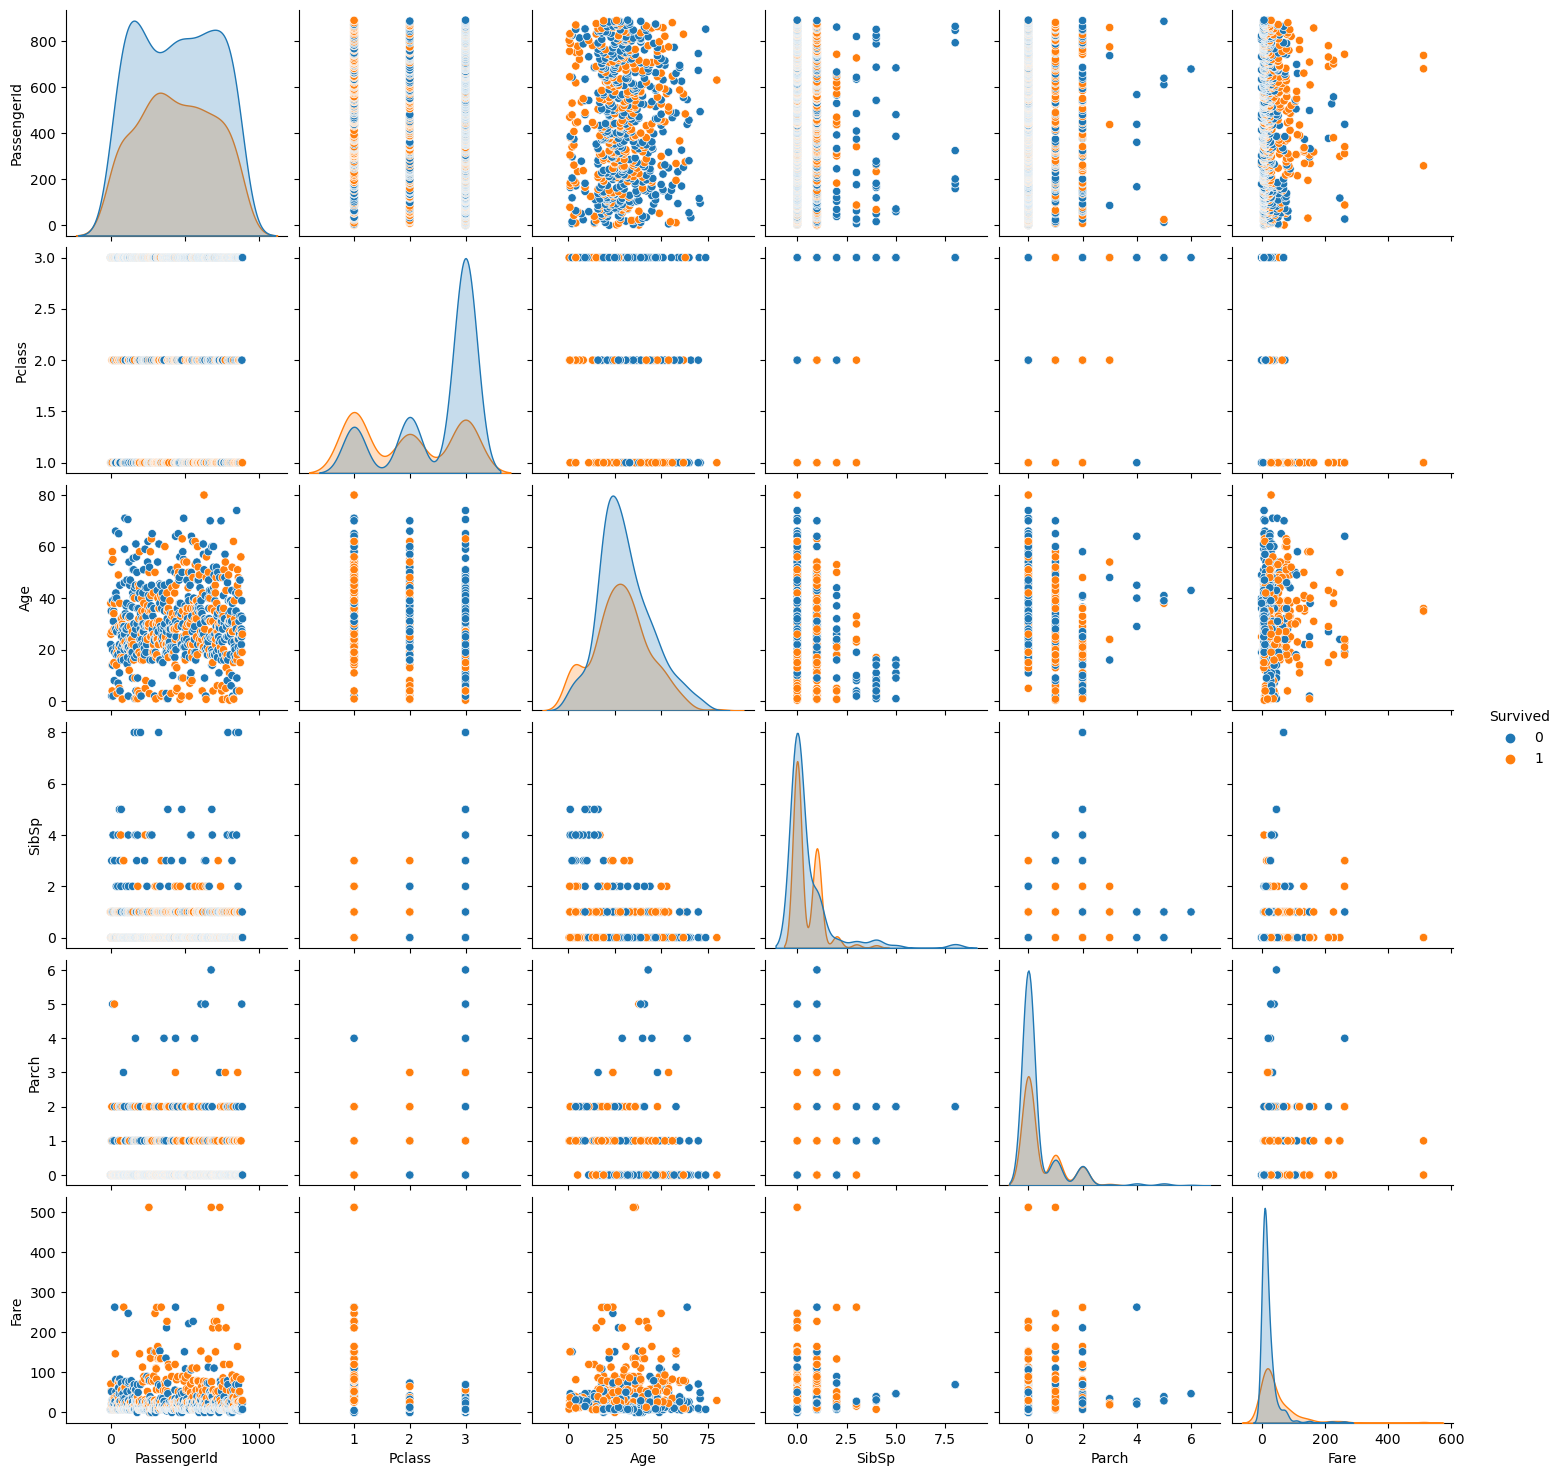

In [76]:
sns.pairplot(data,hue="Survived")
plt.show()

### HeatMap
Using a heatmap to visualize the correlation matrix of numerical features in the dataset, with annotations displaying the correlation values

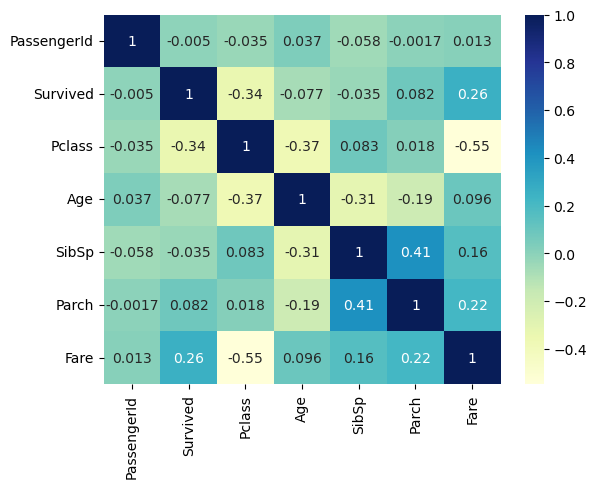

In [77]:
dataplot = sns.heatmap(data.corr(numeric_only=True), cmap="YlGnBu", annot=True)
plt.show()

### Handling Null Values

In [78]:
data['age'] = data['Age'].fillna(data['Age'].mean())

In [79]:
data['age'].isnull().sum()

0

### Age' distribution before & after imputation, allowing us to compare the changes in the data.

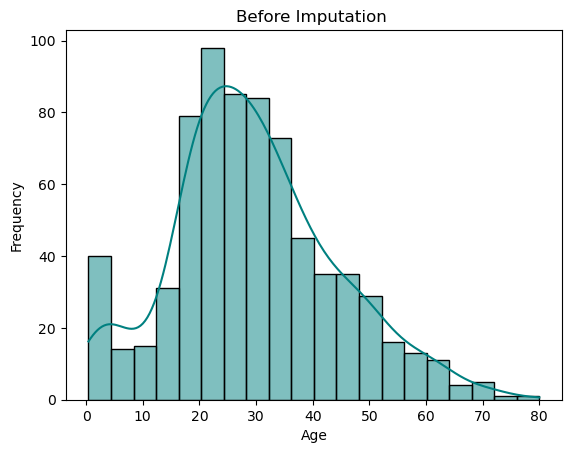

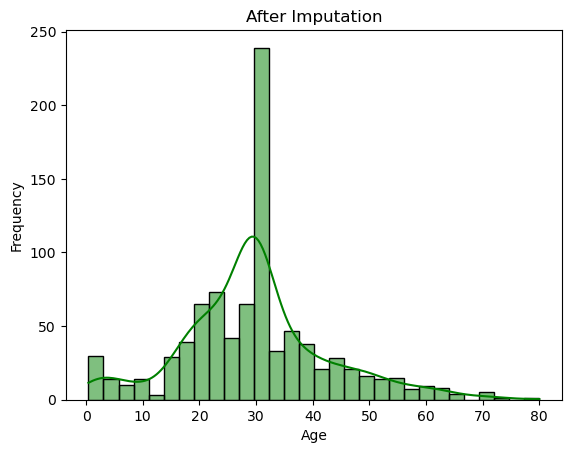

In [80]:
sns.histplot(data['Age'], kde=True, color='teal')
plt.title('Before Imputation ')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

sns.histplot(data['age'], kde=True, color='green')
plt.title('After Imputation')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

### Dropping Columns

In [81]:
data['Embarked'].dropna(inplace=True)

In [82]:
data.drop(columns=['Age','Cabin','PassengerId','Name'],inplace=True)

In [83]:
data.head()

,Survived,Pclass,Sex,SibSp,Parch,Ticket,Fare,Embarked,age
0,0,3,male,1,0,A/5 21171,7.2500,S,22.0
1,1,1,female,1,0,PC 17599,71.2833,C,38.0
2,1,3,female,0,0,STON/O2. 3101282,7.9250,S,26.0
3,1,1,female,1,0,113803,53.1000,S,35.0
4,0,3,male,0,0,373450,8.0500,S,35.0


<Axes: >

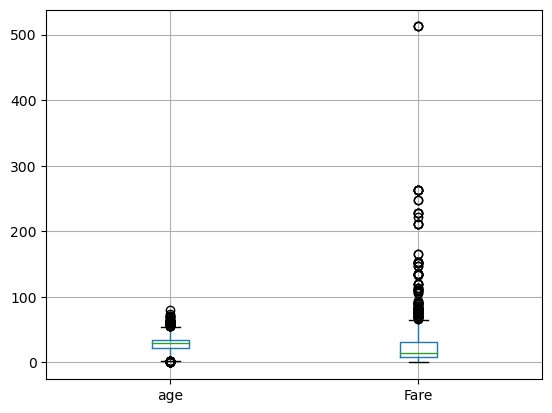

In [84]:
data[['age','Fare']].boxplot()

## Data Preparation

### Handling Outliers

In [85]:
def handling_outliers(col):
    q1 = data[col].quantile(0.25)
    q3 = data[col].quantile(0.75)
    iqr = q3 - q1  # Interquartile Range
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    
    # Cap outliers
    data[col] = data[col].apply(lambda x: upper_bound if x > upper_bound else (lower_bound if x < lower_bound else x))

In [86]:
handling_outliers('age')
handling_outliers('Fare')

<Axes: >

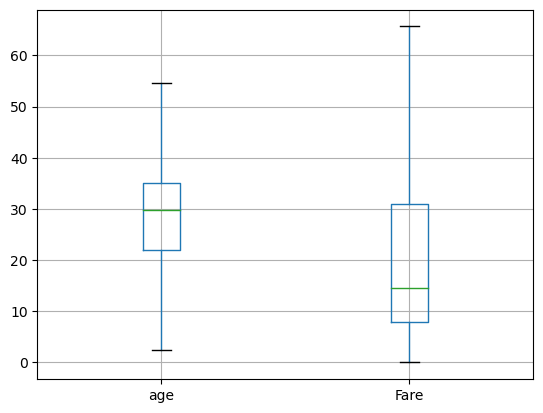

In [87]:
data[['age','Fare']].boxplot()

In [88]:
data.drop(columns=['Ticket'],inplace=True)

### Label Encoding

In [89]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

le = LabelEncoder()
data['Sex']= le.fit_transform(data['Sex'])
data['Embarked'] = le.fit_transform(data['Embarked'])

In [90]:
X = data.iloc[:,1:]
y = data.iloc[:,0]

### Splitting Training And Testing Dataset

In [91]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=32)

### Standard Scaling the Dataset

In [92]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Fit on training data and transform training set
X_train[['age', 'Fare']] = scaler.fit_transform(X_train[['age', 'Fare']])

# Transform test set using the same scaler
X_test[['age', 'Fare']] = scaler.transform(X_test[['age', 'Fare']])

### Model Training

In [93]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

def evaluate_models(y_true, predictions_dict):
    
    print("Model Evaluation Results:\n")
    
    for model_name, y_pred in predictions_dict.items():
        print(f"--- {model_name} ---")
        # Metrics
        print('\nAccuracy Score: ')
        print(accuracy_score(y_true,y_pred))
        print("\nClassification Report:")
        print(classification_report(y_true, y_pred))
        
        # Confusion Matrix
        cm = confusion_matrix(y_true, y_pred)
        plt.figure(figsize=(5, 4))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Purples', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
        plt.title(f"Confusion Matrix: {model_name}")
        plt.xlabel("Predicted Label")
        plt.ylabel("True Label")
        plt.show()
        
        print("\n" + "-" * 40 + "\n")

### HyperParameter Tuning Using GridSearchCV

In [94]:
from sklearn.model_selection import GridSearchCV

rf_params = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

logistic_params = {
    'C': [0.01, 0.1, 1, 10],
    'solver': ['lbfgs', 'liblinear']
}

dt_params = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

svm_params = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']
}

### Predicting Best Estimator Models on Testing Dataset

In [95]:
rf_pred = best_rf_model.predict(X_test)
logistic_pred = best_logistic_model.predict(X_test)
dt_pred = best_dt_model.predict(X_test)
sv_pred = best_svm_model.predict(X_test)

predictions_dict = {
    "Random Forest": rf_pred,
    "Logistic Regression": logistic_pred,
    "Decision Tree": dt_pred,
    "Support Vector Machine": sv_pred,
}

### Evaluation

Model Evaluation Results:

--- Random Forest ---

Accuracy Score: 
0.8659217877094972

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.94      0.89       108
           1       0.90      0.75      0.82        71

    accuracy                           0.87       179
   macro avg       0.87      0.85      0.86       179
weighted avg       0.87      0.87      0.86       179



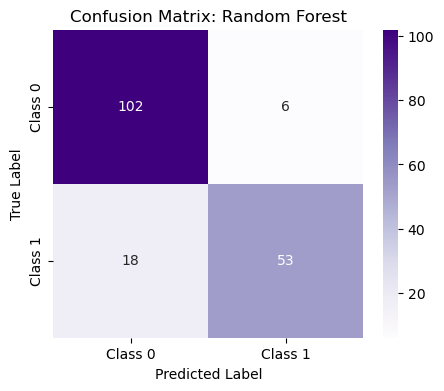


----------------------------------------

--- Logistic Regression ---

Accuracy Score: 
0.7821229050279329

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.85      0.83       108
           1       0.75      0.68      0.71        71

    accuracy                           0.78       179
   macro avg       0.78      0.76      0.77       179
weighted avg       0.78      0.78      0.78       179



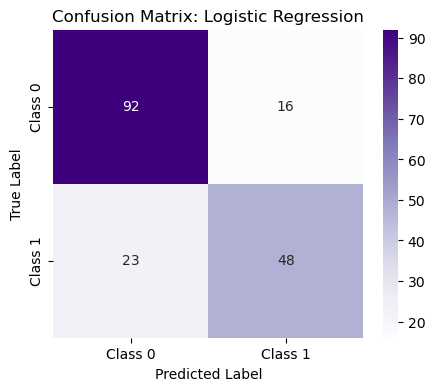


----------------------------------------

--- Decision Tree ---

Accuracy Score: 
0.8212290502793296

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.92      0.86       108
           1       0.84      0.68      0.75        71

    accuracy                           0.82       179
   macro avg       0.83      0.80      0.81       179
weighted avg       0.82      0.82      0.82       179



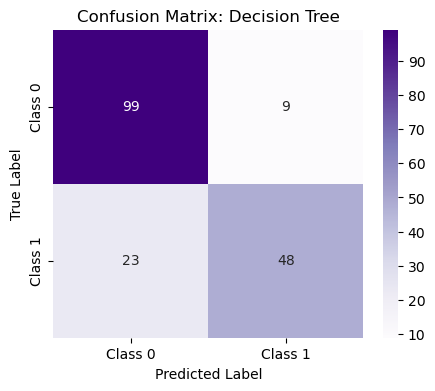


----------------------------------------

--- Support Vector Machine ---

Accuracy Score: 
0.8156424581005587

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.90      0.85       108
           1       0.82      0.69      0.75        71

    accuracy                           0.82       179
   macro avg       0.82      0.79      0.80       179
weighted avg       0.82      0.82      0.81       179



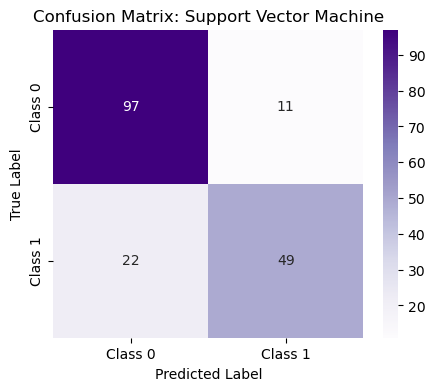


----------------------------------------



In [96]:
evaluate_models(y_test, predictions_dict)

### Conclusion

After evaluating four models, Random Forest emerged as the best performer, providing the highest accuracy and balance between precision and recall. While Logistic Regression, Decision Tree, and Support Vector Machine showed reasonable results, they did not outperform Random Forest. Overall, Random Forest is the most reliable model for predicting Titanic survival, though further improvements can be made through hyperparameter tuning and exploring other advanced models.